In [1]:
# Dependencies and Setup


from pathlib import Path
import scipy.stats as stats
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')



In [2]:
# Read in the data. 
df=pd.read_csv('customer_data.csv')
df.head(5)

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


In [3]:
#check missing values

missing_values = df.isnull().sum()
missing_values

id                    0
age                   0
gender                0
income                0
education             0
region                0
loyalty_status        0
purchase_frequency    0
purchase_amount       0
product_category      0
promotion_usage       0
satisfaction_score    0
dtype: int64

In [4]:
# check duplicates values
duplicates_rows = df[df.duplicated()]
duplicates_rows

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score


In [5]:
df.dtypes


id                     int64
age                    int64
gender                object
income                 int64
education             object
region                object
loyalty_status        object
purchase_frequency    object
purchase_amount        int64
product_category      object
promotion_usage        int64
satisfaction_score     int64
dtype: object

In [6]:
#summary statistics
df.describe()


,id,age,income,purchase_amount,promotion_usage,satisfaction_score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,30.003260,27516.269880,9634.790840,0.300800,5.009650
std,28867.657797,4.480535,12996.782587,4799.339449,0.458608,1.038714
min,1.000000,12.000000,5000.000000,1118.000000,0.000000,0.000000
25%,25000.750000,27.000000,16271.750000,5583.000000,0.000000,4.000000
50%,50000.500000,30.000000,27584.500000,9452.000000,0.000000,5.000000
75%,75000.250000,33.000000,38747.250000,13350.000000,1.000000,6.000000
max,100000.000000,49.000000,50000.000000,26204.000000,1.000000,10.000000


In [ ]:
#Below is code for my research

In [7]:
#Find total number of purchases in each region
df['region'].value_counts()

region
East     30074
West     29935
South    20073
North    19918
Name: count, dtype: int64

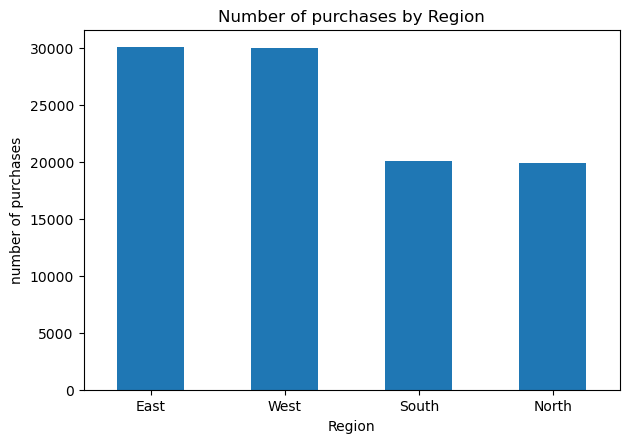

In [8]:
# Configure plot, x-tick rotation, title, and axis labels. Save and show the graph

df['region'].value_counts().plot(kind='bar')
plt.title('Number of purchases by Region')
plt.xlabel('Region')
plt.ylabel('number of purchases')
plt.tight_layout()
plt.xticks(rotation=0)
plt.savefig("Number of purchases by Region.png")
plt.show()

In [9]:
#Get total purchase by region 
df.groupby("region")["purchase_amount"].sum()

region
East     289173865
North    192674021
South    193680103
West     287951095
Name: purchase_amount, dtype: int64

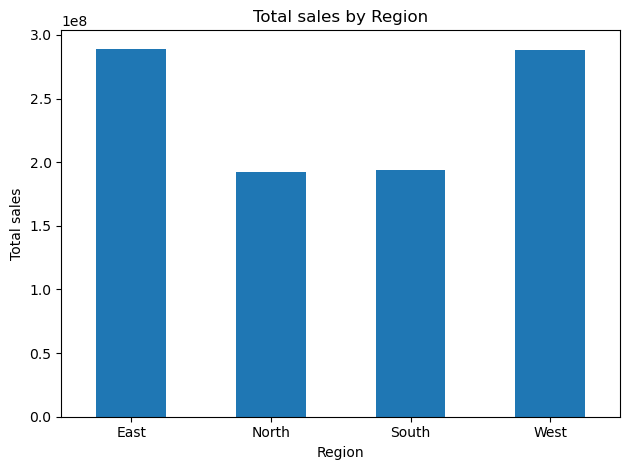

In [10]:
# Configure plot, x-tick rotation, title, and axis labels. Save and show the graph
df.groupby('region')['purchase_amount'].sum().plot(kind='bar')
plt.title('Total sales by Region')
plt.xlabel('Region')
plt.ylabel('Total sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("Total sales by Region.png")
plt.show()

<Axes: title={'center': 'purchase_amount'}, xlabel='region'>

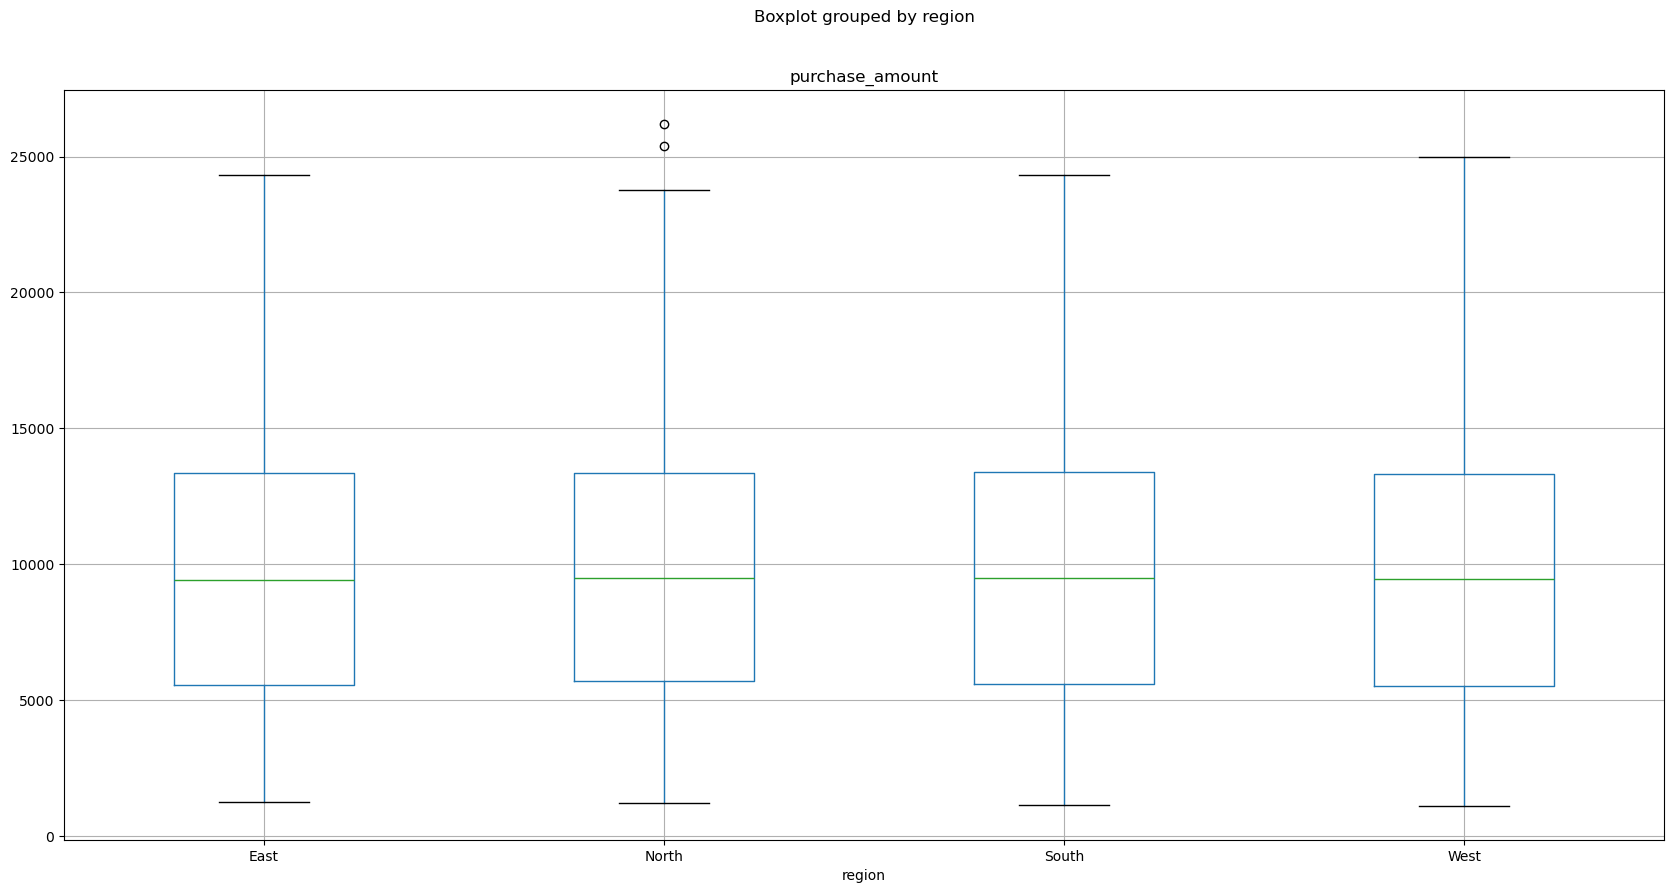

In [12]:
# Create a boxplot to compare means
df.boxplot("purchase_amount", by="region", figsize=(20, 10))


# ANOVA Hypotheses
# Null hypothesis: Groups means are equal (no variation in means of groups). Alternative hypothesis: At least, one group mean is different from other groups. 

In [14]:
# Extract individual groups
group0 = df[df["region"] == 'East']["purchase_amount"]
group1 = df[df["region"] == 'North']["purchase_amount"]
group1 = df[df["region"] == 'South']["purchase_amount"]
group1 = df[df["region"] == 'West']["purchase_amount"]
# Perform the ANOVA
stats.f_oneway(group0, group1)

F_onewayResult(statistic=0.009373702611209948, pvalue=0.922871344817896)

# ANOVA TEST Interpretation: The p value obtained from ANOVA analysis is not significant (p > 0.05), and therefore, we conclude that there are no significant differences among regions.

In [ ]:
#The above research was conducted to address the following inquiry: "Which region exhibits higher levels of sales?"

In [ ]:
#We observed a trend where individuals in the Western and Eastern regions exhibit higher purchase frequency and spend more money compared to those in the Northern and Southern regions.Nevertheless, the average purchase amount remains relatively consistent across all regions.